In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy.stats

In [2]:
filename = 'Experiment_July14_2023_QPU_FullSize_Xbasis_bit0.csv'

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 22})

In [10]:
def get_data(filename):
    Completed_Job_Data = pd.read_csv(filename)

    JobAngles = Completed_Job_Data.iloc[:, 1]
    BobFidelity = Completed_Job_Data.iloc[:, 11]
    EveFidelity = Completed_Job_Data.iloc[:, 12]

    JobAngles = np.array(JobAngles)
    BobFidelity = np.array(BobFidelity)
    EveFidelity = np.array(EveFidelity)
    
    return  JobAngles, BobFidelity, EveFidelity

In [11]:
def fidelity_curves(JobAngles, BobFidelity, EveFidelity, degree):
    Model_Bob = np.poly1d(np.polyfit(JobAngles, BobFidelity, degree))
    Model_Eve = np.poly1d(np.polyfit(JobAngles, EveFidelity, degree))
    Thetas = np.linspace(0, np.pi/4, 100)
    Model_Bob_Curve = Model_Bob(Thetas)
    Model_Eve_Curve = Model_Eve(Thetas)
    return Thetas, Model_Bob_Curve, Model_Eve_Curve

In [12]:
JobAngles, BobFid, EveFid = get_data(filename)

In [13]:
Thetas, Model_Bob_Curve, Model_Eve_Curve = fidelity_curves(JobAngles, BobFid, EveFid, 2)

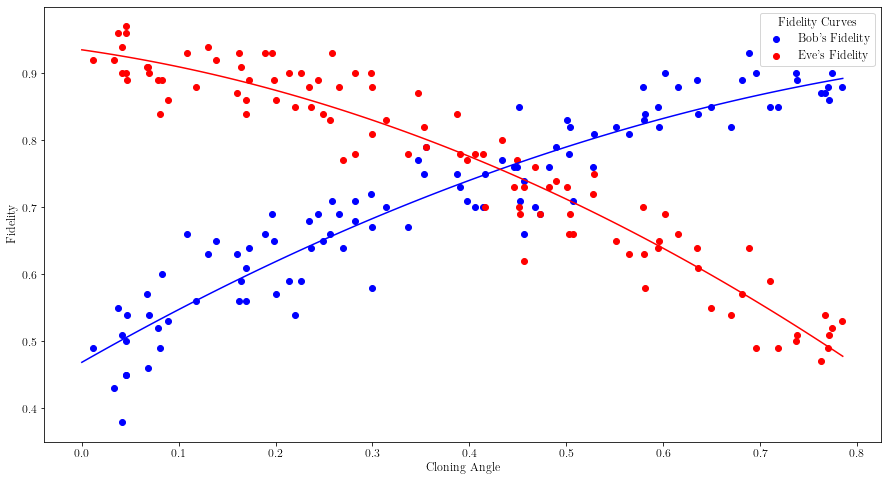

In [14]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 12})
plt.scatter(JobAngles, BobFid, label = "Bob's Fidelity",color='blue')
plt.scatter(JobAngles, EveFid, label = "Eve's Fidelity",color='red')
plt.plot(Thetas, Model_Bob_Curve, color = 'blue')
plt.plot(Thetas, Model_Eve_Curve, color = 'red')
#plt.plot(Thetas, BobFid_Theory, color = 'black')
#plt.plot(Thetas, EveFid_Theory, color = 'black')
#plt.yticks(np.arange(0,1.1, step = .1))
#plt.xticks(np.arange(-np.pi/2, 5*np.pi/8, step = np.pi/8))
plt.legend(title="Fidelity Curves")
plt.xlabel('Cloning Angle')
plt.ylabel('Fidelity')
plt.show()

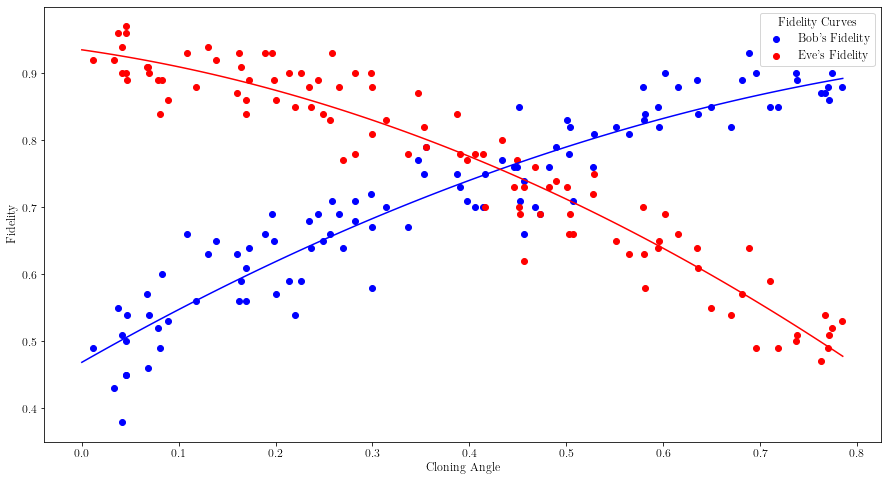

In [15]:
paper_figure = plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 12})
plt.scatter(JobAngles, BobFid, label = "Bob's Fidelity",color='blue')
plt.scatter(JobAngles, EveFid, label = "Eve's Fidelity",color='red')
plt.plot(Thetas, Model_Bob_Curve, color = 'blue')
plt.plot(Thetas, Model_Eve_Curve, color = 'red')
#plt.plot(Thetas, BobFid_Theory, color = 'black')
#plt.plot(Thetas, EveFid_Theory, color = 'black')
#plt.yticks(np.arange(0,1.1, step = .1))
#plt.xticks(np.arange(-np.pi/2, 5*np.pi/8, step = np.pi/8))
plt.legend(title="Fidelity Curves")
plt.xlabel('Cloning Angle')
plt.ylabel('Fidelity')
plt.show()

In [16]:
paper_figure.savefig("fidelity_plot.pdf", bbox_inches = 'tight')